In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Probabilidades Discretas


## Monty Hall

Supón que estás en un concurso y te han dado a elegir entre tres puertas. Detrás de una de ellas hay un coche y detrás de las otras dos hay cabras. Eliges una puerta, digamos la #1, y el presentador, que sabe lo que hay detrás de cada puerta, abre una de las que no has elegido, digamos la #3, dejando ver detrás de ella a una cabra. Y ahora te pregunta: «¿Quieres quedarte con la puerta #2?»

¿Es mejor en este caso cambiar tu elección inicial?


[comment]: <> (https://www.gaussianos.com/marilyn-vos-savant-la-mujer-que-provoco-el-error-de-erdos/.)

<img src="./images/montyhallproblem.png" width="500" height="1024" align="center"/>

# Análisis Visual

<img src="./images/base.png" width="500" height="1024" align="center"/>

# Caso 1: El presentador no abre ninguna prueba

<img src="./images/caso1.png" width="500" height="1024" align="center"/>

# Caso 2: El presentador abre una prueba, mostrando una cabra

Como el presentador abre una puerta, quita una posibilidad.

<img src="./images/caso2.png" width="500" height="1024" align="center"/>

# Análisis con Teorema de Bayes

Supongamos que participamos en el juego y escogemos la puerta N°1, el presentador del programa nos muestra la puerta N°2
Definamos 2 eventos 
+ Evento A: El auto esta en la puerta 1
+ Evento B: El presentador abre puerta 2 y muestra una cabra

No interesa conocer la probabilidad de que el auto este en la puerta 1, dado que el presentador abrio la puerta 2.

<img src="./images/bayes.png" width="500" height="1024" align="center"/>

Supongamos que como escogi la puerta 1, el presentador abre la puerta 2.

+ P(A): Probabilidad de que el auto este en la puerta 1.
+ P(B|A): Como escogi la puerta 1, el presentador puede escoger entre la puerta 2 y 3. Pero debe escoger la puerta 2, debido a nuestra suposición
+ P(B): Es la probabilidad de que el presentador muestre escoja la puerta 2:
    + Auto en puerta 1. El presentador puede escoger entre la puerta 2 y 3. (50 % de escoger puerta 2)
    + Auto en puerta 2. El presentador siempre escoge la puerta 3. (0 % de escoger puerta 2)
    + Auto en puerta 3. El presentador siempre escoge la la puerta 2. (100 % de escoger puerta 2)
    
    
Si el presentador abre la puerta 2, se que el auto esta en la puerta 1 o 3.
Que el auto este en la puerta 1 tiene una probabilidad de 1/3.
Que el auto este en la puerta 3 tiene una probabilidad de 1-1/3 =2/3
Por eso nos conviene cambiar.

In [5]:
def monty_hall():
    [[puerta_seleccionada, puerta_ganadora]] = np.random.random_integers(low=1,high=3,size=(1,2))
    puertas = [1,2,3]
    if puerta_seleccionada == puerta_ganadora:
        # Cuando la selección inicial del concursante es la puerta ganadora, Monty elige entre  
        # las dos puertas restantes al azar. Las dos puertas restantes contienen cabras.
        puertas.remove(puerta_seleccionada)
        puerta_abrir = np.random.choice(puertas)
        # La puerta por la que cambiar el concursante contiene una cabra.
        cambio_puerta = puertas.remove(puerta_abrir)
    else:
        # Cuando la selección inicial del concursante no contiene un coche, sus iniciales 
        # la selección contiene una cabra. Monty entonces abre la otra puerta que contiene una cabra, 
        # dejando el coche detrás de la puerta que cambia.
        puertas.remove(puerta_seleccionada)
        puertas.remove(puerta_ganadora)
        puerta_abrir = puertas
        cambio_puerta = puerta_ganadora
    # Una victoria se indica con un 1, una pérdida se indica con un 0.
    if cambio_puerta == puerta_ganadora:
        cambiar = 1.
        no_cambiar = 0.
    else:
        cambiar = 0.
        no_cambiar = 1.
    return cambiar, no_cambiar

In [6]:
def simulate_monty_hall(n_simulaciones):
    resultado_cambiar = []
    resultado_no_cambiar = []
    for x in range(n_simulaciones):
        cambiar, no_cambiar = monty_hall()
        resultado_cambiar.append(cambiar)
        resultado_no_cambiar.append(no_cambiar)
    return resultado_cambiar, resultado_no_cambiar

In [7]:
pruebas = 10
resultado_cambiar, resultado_no_cambiar = simulate_monty_hall(pruebas)
print("Ganar cambiando de puerta",sum(resultado_cambiar) / len(resultado_cambiar))
print("Ganar sin cambiar de puerta",sum(resultado_no_cambiar) / len(resultado_no_cambiar))

Ganar cambiando de puerta 0.6
Ganar sin cambiar de puerta 0.4


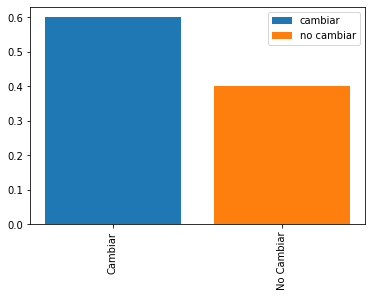

In [8]:
ax = plt.figure()
rects1 = plt.bar(0,sum(resultado_cambiar) / len(resultado_cambiar),label="cambiar")
rects2 = plt.bar(1,sum(resultado_no_cambiar) / len(resultado_no_cambiar),label="no cambiar")
plt.xticks([0,1], ["Cambiar","No Cambiar"], rotation='vertical')
plt.legend()
plt.show()

# Probabilidades Continuas

## Galton Board
<img src="./images/galtonboard.gif" width="240" height="240" align="center"/>


Para este experimento, se debe colocar un gran número de bolas en el embudo y dejarlas correr hacia el tablero de clavos que se encuentra debajo. Cada pelota, a medida que cae, golpeará el clavo debajo del embudo, y rebotará a la izquierda o a la derecha- Así que $p_{l} = 1- p_{r}$. En otras palabras, la probabilidad de que una bola vaya a la izquierda ($p_{l}$) es 1 menos la probabilidad de que una bola vaya a la derecha ($p_{r}$). Si las clavijas están dispuestas simétricamente (como en este caso), $p_{l} = p_{r} = \frac{1}{2}$. Estas pelotas seguirán rebotando contra las clavijas de abajo. En cada clavija, la bola elige al azar una de las dos direcciones. Eventualmente, cada bola caerá en una de las ranuras de la parte inferior.

Cada paso es aleatorio, así que si la bola golpea $n$ clavijas en su viaje descendente, la ranura en la que finalmente termina puede ser considerada como la suma de $n$ variables aleatorias. Como el teorema del límite central nos dice que la suma de las variables aleatorias k se acerca a una distribución normal a medida que k aumenta. 
Esta distribución se acercará cada vez más a lo normal cuanto mayor sea el número de clavijas que tenga nuestro tablero, y cuanto mayor sea el número de bolas que se dejen caer.


In [145]:
def galton_experimento(altura, bolas):
    containers = [0] * (altura + 1)
    index = range(0,altura+1)
    for _ in range(bolas):
        pos = 0
        for i in range(0, altura):
            #binomial
            turn = np.random.randint(2, size=1)
            if turn == 1:
                pos += 1
        containers[pos] = containers[pos] + 1
    return index,containers

<BarContainer object of 1001 artists>

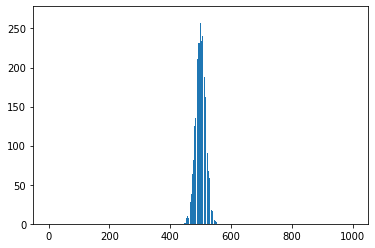

In [319]:
altura = 1000
bolas = 10000
x,y = galton_experimento(altura =altura,bolas=bolas )
plt.bar(x,y,align='center')

## Regresion a la media

In [317]:
galton = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t', header=0)

In [318]:
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


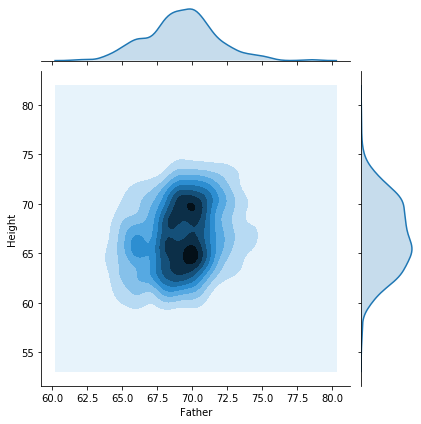

In [315]:
sns.jointplot(x=galton['Father'], y=galton["Height"], kind='kde')

In [241]:
fc = galton['Father'] - np.mean(galton['Father'])
mc = galton['Mother'] - np.mean(galton['Mother'])
cc = galton['Height'] - np.mean(galton['Height'])

In [242]:
x=fc
y=cc
X = x[:,np.newaxis]

x2=mc
X2 = x2[:,np.newaxis]

In [276]:
from sklearn.linear_model import LinearRegression
fmodel = LinearRegression(fit_intercept=True)
fmodel.fit(X,y)
print("Media hijo(a):",np.mean(galton['Height']))

Media hijo(a): 66.76069042316252


In [257]:
alturas = np.array([75,60])
alturas = alturas[:,np.newaxis]
ypred = fmodel.predict(alturas[0:1]-np.mean(galton['Father']))
print("Predicción de la altura de ",alturas[0:1][0][0], " : ",ypred.round(2)+np.mean(galton['Father']))
ypred = fmodel.predict(alturas[1:]-np.mean(galton['Father']))
print("Predicción de la altura de ",alturas[1:][0][0], " : ",ypred.round(2)+np.mean(galton['Father']))

Predicción de la altura de  75  :  [71.53285078]
Predicción de la altura de  60  :  [65.54285078]


+ Los hijos de padres muy altos tienden a ser más altos que el promedio, pero más pequeños que sus padres

+ Los hijos de padres muy pequeños tienden a ser más pequeños que el promedio pero más altos que sus padres.


Esto se conoce como regresión a la media y ocurre cuando se realizan mediciones repetidas.  Significa que, en general, es probable que las observaciones relativamente altas (o bajas) sean seguidas por otras menos extremas más cercanas a la media real del sujeto. 

In [295]:
from sklearn.linear_model import LinearRegression
mmodel = LinearRegression(fit_intercept=True)
mmodel.fit(X2,y)
print("Media hijo(a):",np.mean(galton['Height']))

Media hijo(a): 66.76069042316252


In [289]:
alturas = np.array([75,60])
alturas = alturas[:,np.newaxis]
ypred = mmodel.predict(alturas[0:1]-np.mean(galton['Father']))
print("Predicción de la altura de ",alturas[0:1][0][0], " : ",ypred.round(2)+np.mean(galton['Father']))
ypred = mmodel.predict(alturas[1:]-np.mean(galton['Father']))
print("Predicción de la altura de ",alturas[1:][0][0], " : ",ypred.round(2)+np.mean(galton['Father']))

Predicción de la altura de  75  :  [71.04285078]
Predicción de la altura de  60  :  [66.34285078]


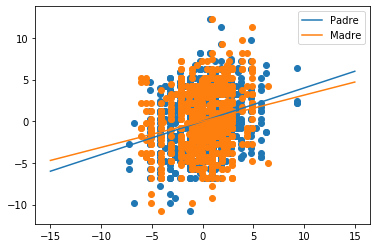

In [313]:
xpred = np.linspace(-15, 15).reshape(-1,1)
Fpred = fmodel.predict(xpred)
Mpred = mmodel.predict(xpred)
 
plt.scatter(fc, cc)
plt.scatter(mc, cc)
 
plt.plot(xpred,Fpred,label="Padre")
plt.plot(xpred,Mpred,label="Madre")
plt.legend()
 

In [9]:
# sns.distplot(fc[fc.between(5,10 )])